# Regression Model for Predicting Delta_LEDD Using Jaccard Index

This notebook demonstrates how to build and evaluate two linear regression models to predict the `Delta_LEDD` scores based on the Jaccard Index values for `STN` and `GPI`. One model is for the right side leads, and the other is for the left side leads.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Get the DataFrame

In [ ]:
from google.colab import drive
# Step 1: Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the CSV files from Google Drive
df_path = '/content/drive/My Drive/VTA/Cleaned_Merged_File.csv'

led_df = pd.read_csv(df_path)

led_df.head()

,Patient Number,Target,Leads,age,Sex,Delta_LEDD,Left STN Jaccard Index,Right STN Jaccard Index,Left GPI Jaccard Index,Right GPI Jaccard Index,Sex_M
0,20,STN,R,64.035616,M,59.451220,0.000000,0.000000,0.0,0.000000,1.0
1,21,STN,Bi,54.734247,F,68.421053,0.000000,0.072361,0.0,0.000000,0.0
2,22,STN,R,79.342466,M,73.867596,0.000000,0.000000,0.0,0.000000,1.0
3,23,GPi,Bi,71.252055,M,-12.987013,0.034366,0.000000,0.0,0.000000,1.0
4,24,STN,R,66.693151,M,30.000000,0.002994,0.042165,0.0,0.024605,1.0


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Filter the DataFrame for right leads
right_lead_df = led_df[(led_df['Leads'] == 'R') | (led_df['Leads'] == 'Bi')].copy()
right_features = right_lead_df[['Right STN Jaccard Index', 'Right GPI Jaccard Index', 'age', 'Sex_M']]
right_target = right_lead_df['Delta_LEDD']

# Filter the DataFrame for left leads
left_lead_df = led_df[(led_df['Leads'] == 'L') | (led_df['Leads'] == 'Bi')].copy()
left_features = left_lead_df[['Left STN Jaccard Index', 'Left GPI Jaccard Index', 'age', 'Sex_M']]
left_target = left_lead_df['Delta_LEDD']

# Train the model for right side
right_model = LinearRegression()
right_model.fit(right_features, right_target)

# Train the model for left side
left_model = LinearRegression()
left_model.fit(left_features, left_target)

# Predict and evaluate for right side
right_predictions = right_model.predict(right_features)
right_r_squared = r2_score(right_target, right_predictions)
right_mse = mean_squared_error(right_target, right_predictions)

# Predict and evaluate for left side
left_predictions = left_model.predict(left_features)
left_r_squared = r2_score(left_target, left_predictions)
left_mse = mean_squared_error(left_target, left_predictions)

# Output the results
print("Right Side Model R-squared:", right_r_squared)
print("Right Side Model Mean Squared Error:", right_mse)

print("Left Side Model R-squared:", left_r_squared)
print("Left Side Model Mean Squared Error:", left_mse)


Right Side Model R-squared: 0.09433099291316693
Right Side Model Mean Squared Error: 1299.9182533834178
Left Side Model R-squared: 0.08260030107615812
Left Side Model Mean Squared Error: 1316.7744519816022


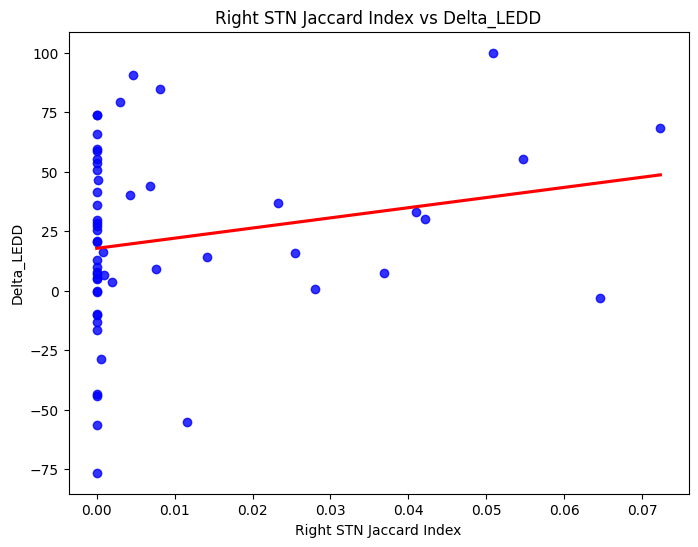

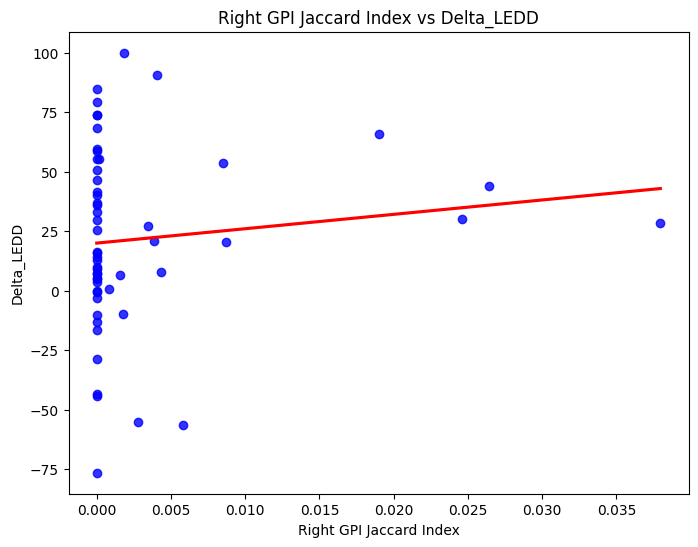

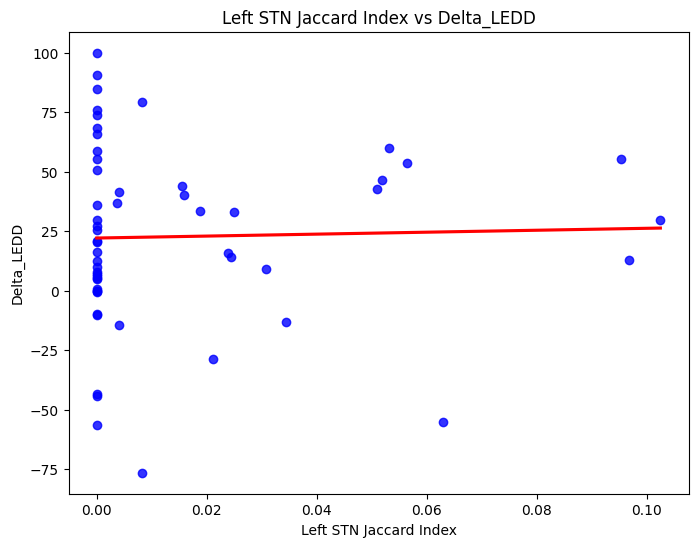

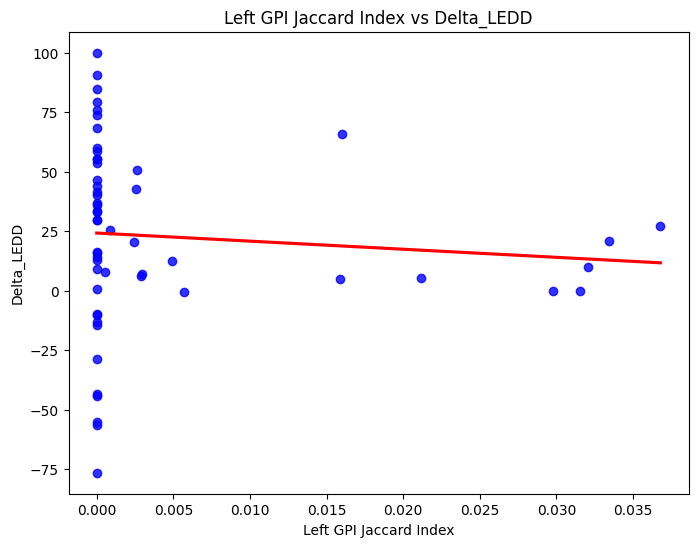

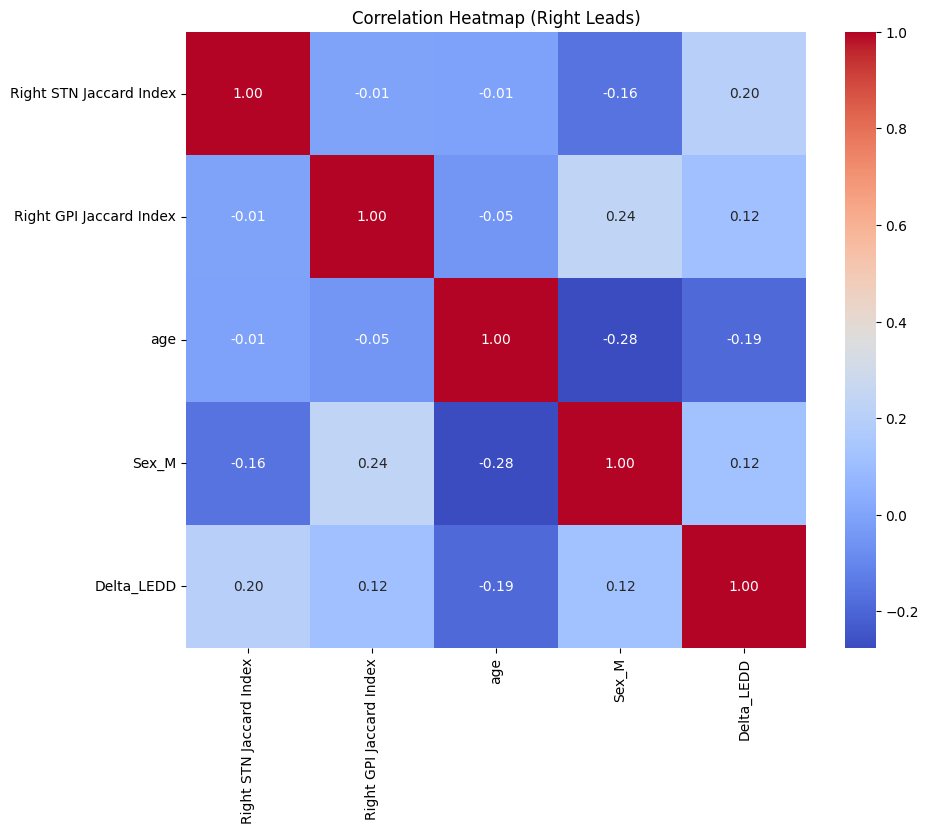

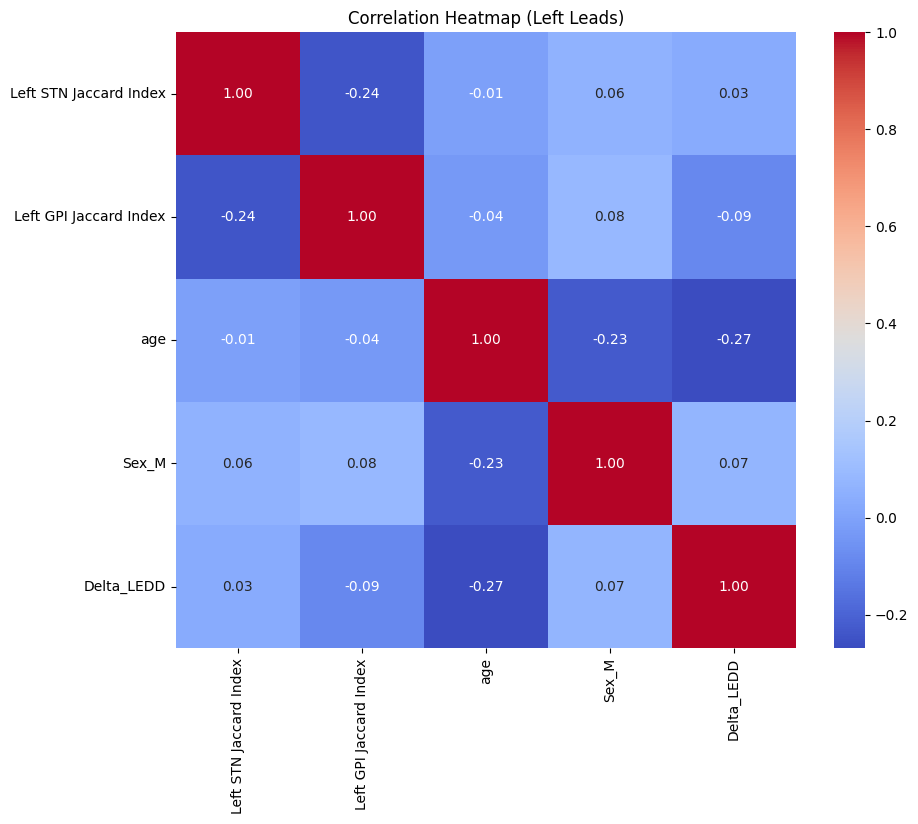

In [ ]:
# Visualization

# Function to create scatter plot with line of best fit
def plot_with_best_fit(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x, y=y, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Right STN Jaccard Index vs Delta_LEDD
plot_with_best_fit(right_lead_df['Right STN Jaccard Index'], right_target,
                   "Right STN Jaccard Index vs Delta_LEDD",
                   "Right STN Jaccard Index", "Delta_LEDD")

# Right GPI Jaccard Index vs Delta_LEDD
plot_with_best_fit(right_lead_df['Right GPI Jaccard Index'], right_target,
                   "Right GPI Jaccard Index vs Delta_LEDD",
                   "Right GPI Jaccard Index", "Delta_LEDD")

# Left STN Jaccard Index vs Delta_LEDD
plot_with_best_fit(left_lead_df['Left STN Jaccard Index'], left_target,
                   "Left STN Jaccard Index vs Delta_LEDD",
                   "Left STN Jaccard Index", "Delta_LEDD")

# Left GPI Jaccard Index vs Delta_LEDD
plot_with_best_fit(left_lead_df['Left GPI Jaccard Index'], left_target,
                   "Left GPI Jaccard Index vs Delta_LEDD",
                   "Left GPI Jaccard Index", "Delta_LEDD")

# Heatmap of correlations for right lead
plt.figure(figsize=(10, 8))
sns.heatmap(right_features.join(right_target).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Right Leads)")
plt.show()

# Heatmap of correlations for left lead
plt.figure(figsize=(10, 8))
sns.heatmap(left_features.join(left_target).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Left Leads)")
plt.show()

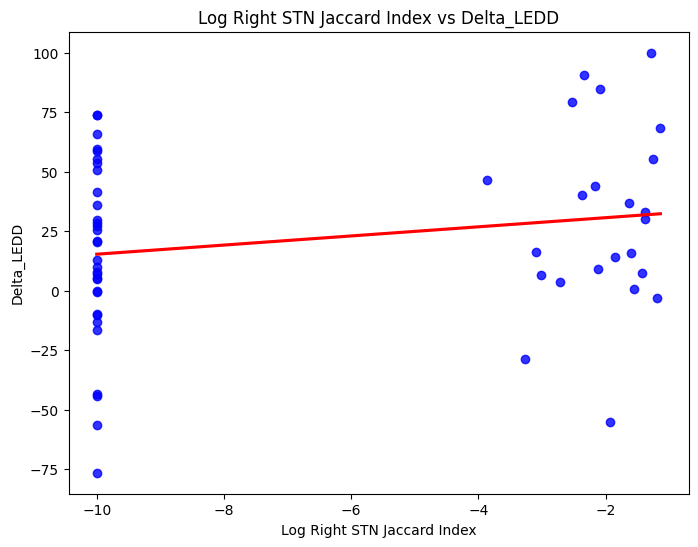

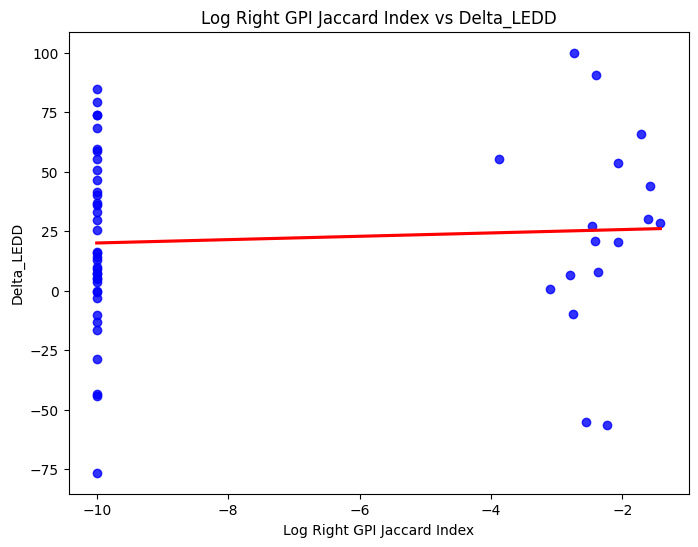

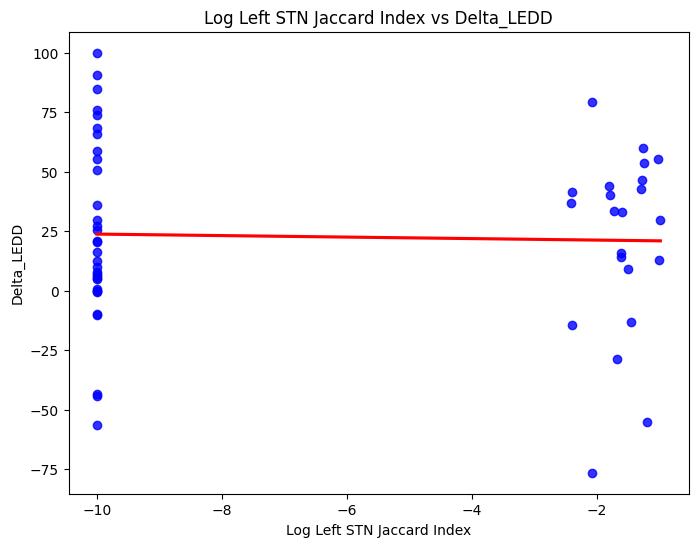

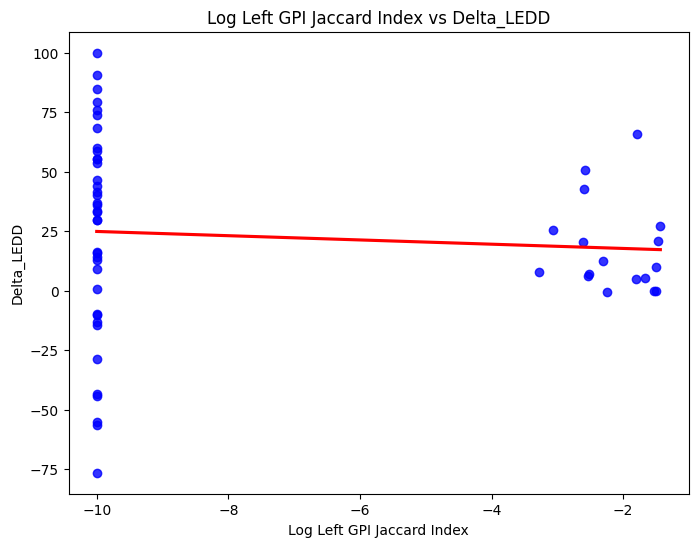

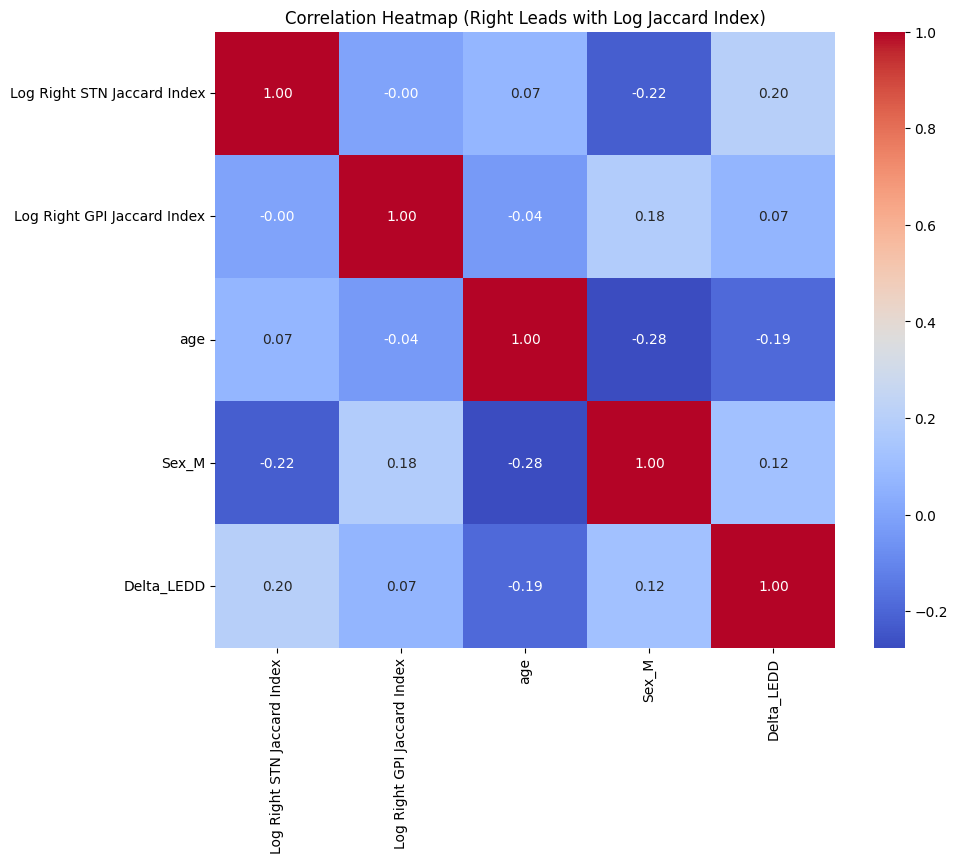

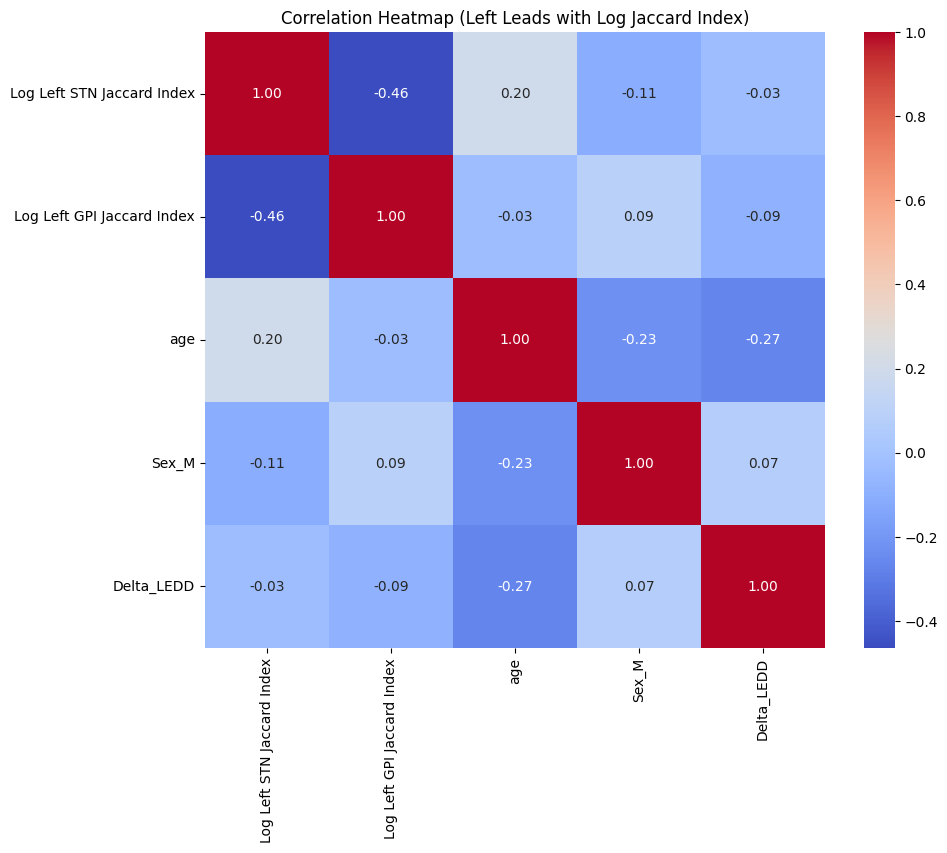

In [ ]:
# With Log Transform

# Apply log transformation to Jaccard Index values
right_lead_df['Log Right STN Jaccard Index'] = np.log10(right_lead_df['Right STN Jaccard Index'] + 1e-10)
right_lead_df['Log Right GPI Jaccard Index'] = np.log10(right_lead_df['Right GPI Jaccard Index'] + 1e-10)
left_lead_df['Log Left STN Jaccard Index'] = np.log10(left_lead_df['Left STN Jaccard Index'] + 1e-10)
left_lead_df['Log Left GPI Jaccard Index'] = np.log10(left_lead_df['Left GPI Jaccard Index'] + 1e-10)

# Function to create scatter plot with line of best fit
def plot_with_best_fit(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x, y=y, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Right STN Jaccard Index vs Delta_LEDD (Log Transformed)
plot_with_best_fit(right_lead_df['Log Right STN Jaccard Index'], right_target,
                   "Log Right STN Jaccard Index vs Delta_LEDD",
                   "Log Right STN Jaccard Index", "Delta_LEDD")

# Right GPI Jaccard Index vs Delta_LEDD (Log Transformed)
plot_with_best_fit(right_lead_df['Log Right GPI Jaccard Index'], right_target,
                   "Log Right GPI Jaccard Index vs Delta_LEDD",
                   "Log Right GPI Jaccard Index", "Delta_LEDD")

# Left STN Jaccard Index vs Delta_LEDD (Log Transformed)
plot_with_best_fit(left_lead_df['Log Left STN Jaccard Index'], left_target,
                   "Log Left STN Jaccard Index vs Delta_LEDD",
                   "Log Left STN Jaccard Index", "Delta_LEDD")

# Left GPI Jaccard Index vs Delta_LEDD (Log Transformed)
plot_with_best_fit(left_lead_df['Log Left GPI Jaccard Index'], left_target,
                   "Log Left GPI Jaccard Index vs Delta_LEDD",
                   "Log Left GPI Jaccard Index", "Delta_LEDD")

# Heatmap of correlations for right lead with log-transformed Jaccard Index
plt.figure(figsize=(10, 8))
right_features_log = right_lead_df[['Log Right STN Jaccard Index', 'Log Right GPI Jaccard Index', 'age', 'Sex_M']]
sns.heatmap(right_features_log.join(right_target).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Right Leads with Log Jaccard Index)")
plt.show()

# Heatmap of correlations for left lead with log-transformed Jaccard Index
plt.figure(figsize=(10, 8))
left_features_log = left_lead_df[['Log Left STN Jaccard Index', 'Log Left GPI Jaccard Index', 'age', 'Sex_M']]
sns.heatmap(left_features_log.join(left_target).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Left Leads with Log Jaccard Index)")
plt.show()


### Step 1: Data Preparation

### Step 2: Filter Data Based on Leads

In [ ]:
# Filter the DataFrame for right leads
right_lead_df = led_df [(led_df ['Leads'] == 'R') | (led_df ['Leads'] == 'Bi')].copy()
right_features = right_lead_df[['Right STN Jaccard Index', 'Right GPI Jaccard Index']]
right_target = right_lead_df['Delta_LEDD']

# Filter the DataFrame for left leads
left_lead_df = led_df [(led_df ['Leads'] == 'L') | (led_df ['Leads'] == 'Bi')].copy()
left_features = left_lead_df[['Left STN Jaccard Index', 'Left GPI Jaccard Index']]
left_target = left_lead_df['Delta_LEDD']

### Step 3: Train the Regression Models

In [ ]:
# Train the model for right side
right_model = LinearRegression()
right_model.fit(right_features, right_target)

# Train the model for left side
left_model = LinearRegression()
left_model.fit(left_features, left_target)

LinearRegression()

### Step 4: Evaluate the Models

In [ ]:
# Predict and evaluate for right side
right_predictions = right_model.predict(right_features)
right_r_squared = r2_score(right_target, right_predictions)
right_mse = mean_squared_error(right_target, right_predictions)

# Predict and evaluate for left side
left_predictions = left_model.predict(left_features)
left_r_squared = r2_score(left_target, left_predictions)
left_mse = mean_squared_error(left_target, left_predictions)

# Output the results
print("Right Side Model R-squared:", right_r_squared)
print("Right Side Model Mean Squared Error:", right_mse)

print("Left Side Model R-squared:", left_r_squared)
print("Left Side Model Mean Squared Error:", left_mse)

Right Side Model R-squared: 0.054650964102222144
Right Side Model Mean Squared Error: 1356.871503790033
Left Side Model R-squared: 0.007917060233980533
Left Side Model Mean Squared Error: 1423.9698038522508


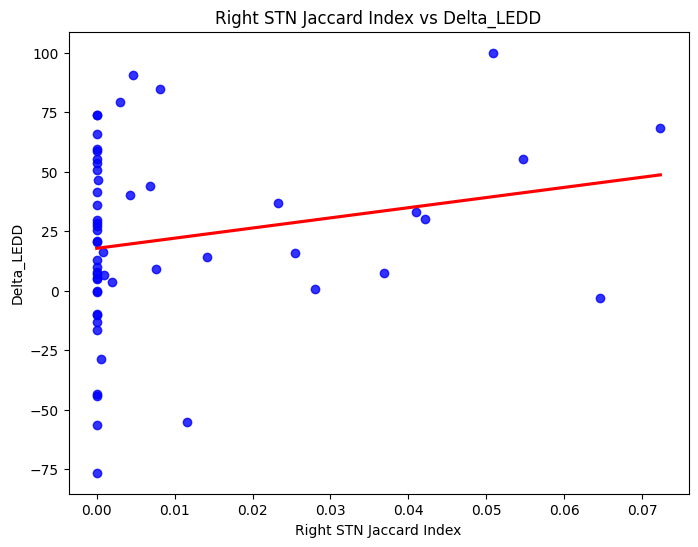

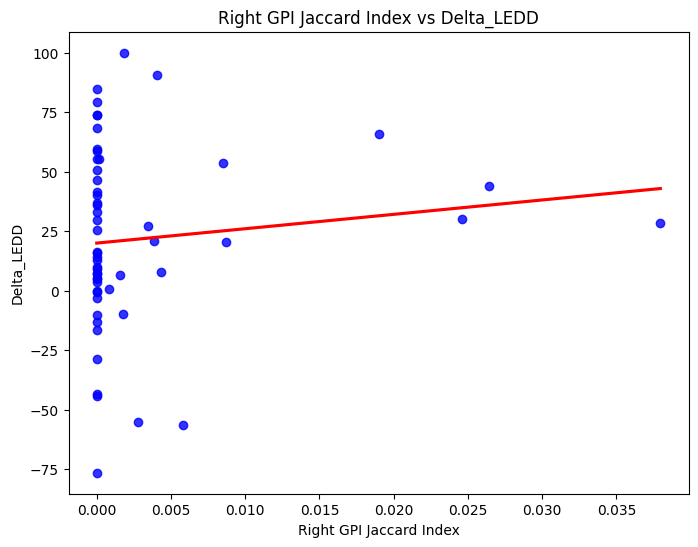

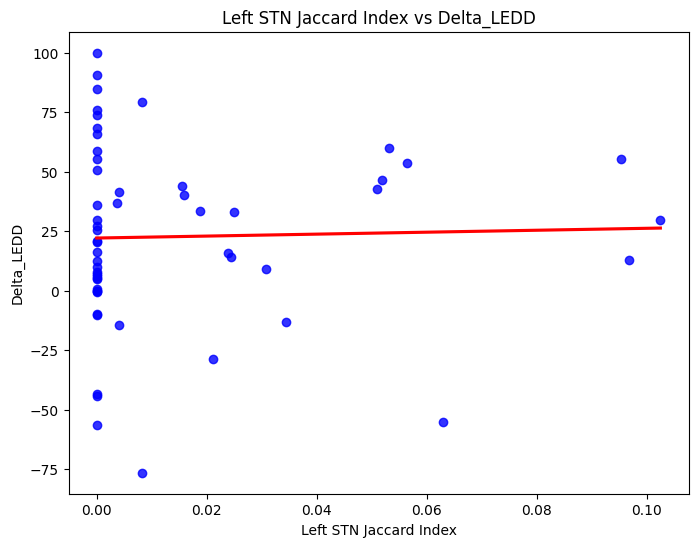

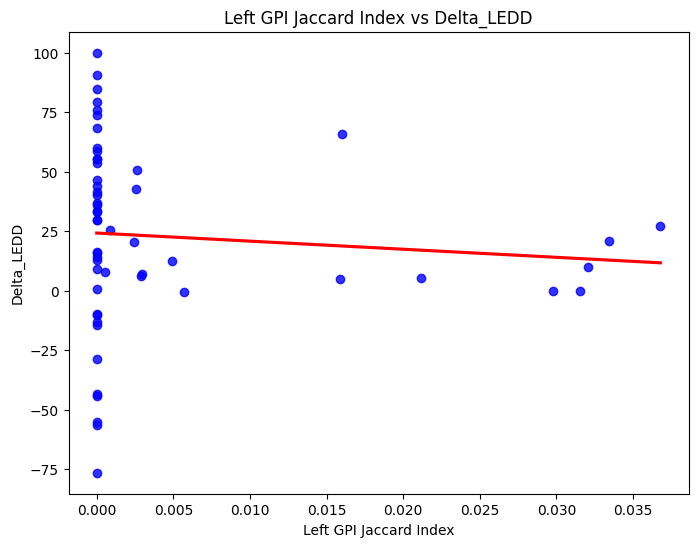

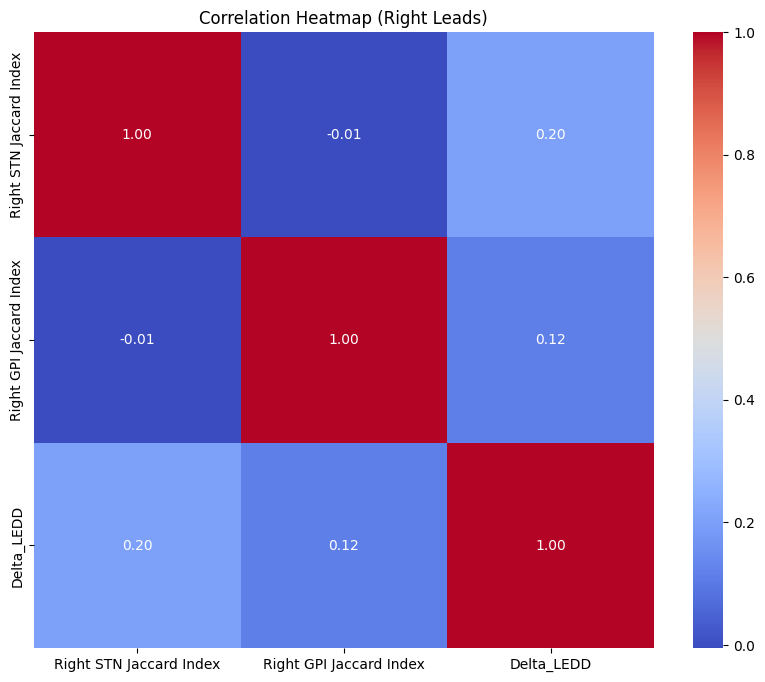

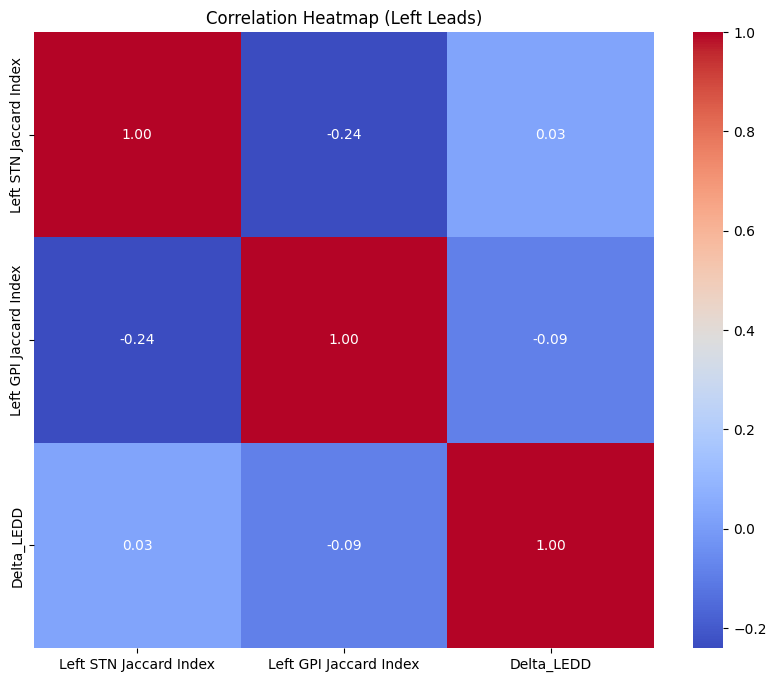

In [ ]:
# Visualization

# Function to create scatter plot with line of best fit
def plot_with_best_fit(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x, y=y, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Right STN Jaccard Index vs Delta_LEDD
plot_with_best_fit(right_lead_df['Right STN Jaccard Index'], right_target,
                   "Right STN Jaccard Index vs Delta_LEDD",
                   "Right STN Jaccard Index", "Delta_LEDD")

# Right GPI Jaccard Index vs Delta_LEDD
plot_with_best_fit(right_lead_df['Right GPI Jaccard Index'], right_target,
                   "Right GPI Jaccard Index vs Delta_LEDD",
                   "Right GPI Jaccard Index", "Delta_LEDD")

# Left STN Jaccard Index vs Delta_LEDD
plot_with_best_fit(left_lead_df['Left STN Jaccard Index'], left_target,
                   "Left STN Jaccard Index vs Delta_LEDD",
                   "Left STN Jaccard Index", "Delta_LEDD")

# Left GPI Jaccard Index vs Delta_LEDD
plot_with_best_fit(left_lead_df['Left GPI Jaccard Index'], left_target,
                   "Left GPI Jaccard Index vs Delta_LEDD",
                   "Left GPI Jaccard Index", "Delta_LEDD")

# Heatmap of correlations for right lead
plt.figure(figsize=(10, 8))
sns.heatmap(right_features.join(right_target).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Right Leads)")
plt.show()

# Heatmap of correlations for left lead
plt.figure(figsize=(10, 8))
sns.heatmap(left_features.join(left_target).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Left Leads)")
plt.show()